In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)

full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
full_data.head()

,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,YCOORD,XCOORD,DATE_TIME
0,773A,UNCONSCIOUS PERS,39.824332,-86.236119,2006-12-28 04:45:48
1,774A,ASSAULT/TRAUMA,39.781627,-86.120826,2006-12-28 04:48:53
2,768A,SEIZURE,39.756840,-85.998714,2006-12-28 04:52:19
3,773A,UNCONSCIOUS PERS,39.782064,-86.044592,2006-12-28 05:10:57
4,790A,*MEDICAL ALARM,39.742415,-86.111559,2006-12-28 05:17:56


In [3]:
start = 300000
end = start + 2000
data = full_data[start:end]
data.reset_index(drop=True, inplace=True)

all_events = PointProcessTrain(data, xgridsize = 75, ygridsize = 75, w = [.1,.01, .005], time_scale_label = 'hours')

In [4]:
all_events.train()

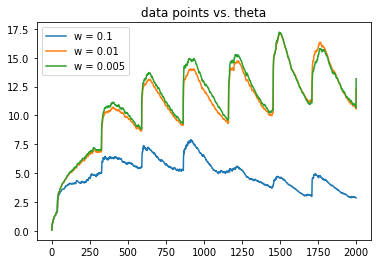


Hour vector: 
[0.02269107 0.01287048 0.01715526 0.01183926 0.01098546 0.00766475
 0.01087327 0.02538499 0.01803279 0.01734975 0.02882428 0.04824648
 0.03631042 0.04097157 0.02974109 0.05250755 0.0550569  0.07293048
 0.0599337  0.07860934 0.07584964 0.07517506 0.085281   0.1057154 ]
Day vector: 
[4.94328043e-26 2.04223038e-19 6.87208241e-13 3.29282183e-07
 9.49999671e-01 5.00000000e-02 4.09788042e-32]


In [5]:
all_events.param_examine()

In [6]:
test_points = full_data[end:end+200]
test_points.reset_index(drop=True, inplace=True)
all_events.simulate_no_update(test_points, num_hotspots = 20, time_increment = 15, increment_scale = 'minutes')

Predicting over time of 18.862542251999997 hours. Generating 76 intensity prediction(s)

Predicted hotspots in real top 20
Grid: (27, 41), Model: 6.180065425886077, Real: 4.0
Grid: (27, 31), Model: 4.283050429109486, Real: 4.0
Grid: (26, 31), Model: 3.7436362979459443, Real: 3.0
Grid: (26, 32), Model: 2.429186876985125, Real: 2.0
Grid: (30, 32), Model: 2.012911943443442, Real: 4.0
Grid: (26, 28), Model: 1.8907302502918681, Real: 2.0
Grid: (26, 27), Model: 1.7170740861141547, Real: 3.0
Grid: (26, 30), Model: 1.3762957128619902, Real: 2.0
Grid: (29, 32), Model: 1.3606403972610563, Real: 3.0
Grid: (22, 31), Model: 1.342379496380707, Real: 2.0

Predicted hotstpots not in real top 20
Grid: (26, 41), Model: 2.1306152744821016, Real: 2.0
Grid: (25, 31), Model: 2.069918113488536, Real: 1.0
Grid: (31, 33), Model: 1.9885780123898116, Real: 1.0
Grid: (26, 34), Model: 1.975746091628678, Real: 2.0
Grid: (39, 42), Model: 1.8967433512206187, Real: 2.0
Grid: (27, 29), Model: 1.6130857712915223, Real: 

array([[[ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06],
        [ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06],
        [ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06],
        ...,
        [ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06],
        [ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06],
        [ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06]],

       [[ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e-04, -5.23399498e-06],
        [ 6.89654375e-05, -1.11866682e-07,  6.88537748e-05, ...,
         -4.97557575e-06,  1.66654980e

In [7]:
all_events.model_hotspot_examine(700, num_hotspots = 20)

Location and value of largest and smallest sum(Lambda): 
265.92552430899474 (27, 41) 2.9252043682135658 (0, 0)

Location of grid with most events:
18.0 (27, 41)

Historical time period is 59.18763258 hours

Trained hotspots in real top 20
Grid: (27, 41), Model: 22.485003180635196, Real: 18
Grid: (27, 31), Model: 15.902707300760596, Real: 13
Grid: (26, 31), Model: 13.507902692199139, Real: 14
Grid: (26, 32), Model: 7.865229509700305, Real: 10
Grid: (26, 34), Model: 6.640387492687562, Real: 5
Grid: (26, 41), Model: 6.5643108830476775, Real: 6
Grid: (25, 31), Model: 6.273062489245463, Real: 10
Grid: (26, 28), Model: 6.1860020585018, Real: 6
Grid: (31, 33), Model: 5.699206453767334, Real: 7
Grid: (29, 32), Model: 5.600190463120618, Real: 5
Grid: (35, 43), Model: 5.0808527098122065, Real: 6
Grid: (26, 27), Model: 4.942770038153012, Real: 5
Grid: (34, 34), Model: 4.439703127177061, Real: 5

Trained hotstpots not in real top 20
Grid: (26, 33), Model: 6.572537195395802, Real: 4
Grid: (26, 35),